<a href="https://colab.research.google.com/github/Radhika-jindal-05/first-demo/blob/main/radhika_mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
#importing the widely used libraries
#numpy:Used for working with arrays and numerical operations.
#pandas:for data manipulation and analysis.
#matplotlib:Used for data visualization(line graphs, bar charts, histograms, scatter plots)
#seaborn:for statistical data visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOAD DATASET**

In [ ]:
#reading the csv file
data=pd.read_csv('/content/heart_final.csv')

**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
#checking the dimension of our DataFrame
data.shape

(918, 12)

In [ ]:
#printing the columns of our data
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#printing first 5 rows
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#printing last 5 rows
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
#displays concise summary of a pandas DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#checking for the total null values in each column
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#gives a quick statistical overview of numerical features in your dataset
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Separate numerical and categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
#printing numerical columns
numerical_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [ ]:
#printing categorical columns
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
#checking forthe total duplicated rows in the data
data.duplicated().sum()

np.int64(0)

In [ ]:
# Loops through each column and prints the count of unique values in that column
 #(useful for understanding categorical data and class distribution)
for col in data.columns:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts())
    print("-" * 50)

Value counts for column 'Age':
Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64
--------------------------------------------------
Value counts for column 'Sex':
Sex
M    725
F    193
Name: count, dtype: int64
--------------------------------------------------
Value counts for column 'ChestPainType':
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
--------------------------------------------------
Value counts for column 'RestingBP':
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117     

**EXPLORATORY DATA ANALYSIS (VISUALISATION)**

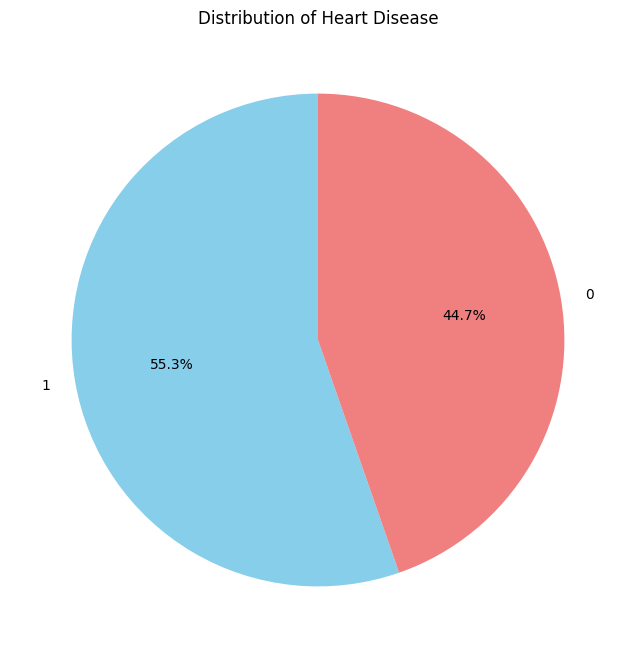

In [ ]:
# Pie plot for HeartDisease column
plt.figure(figsize=(8, 8))
data['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease')
plt.ylabel('')
plt.show()

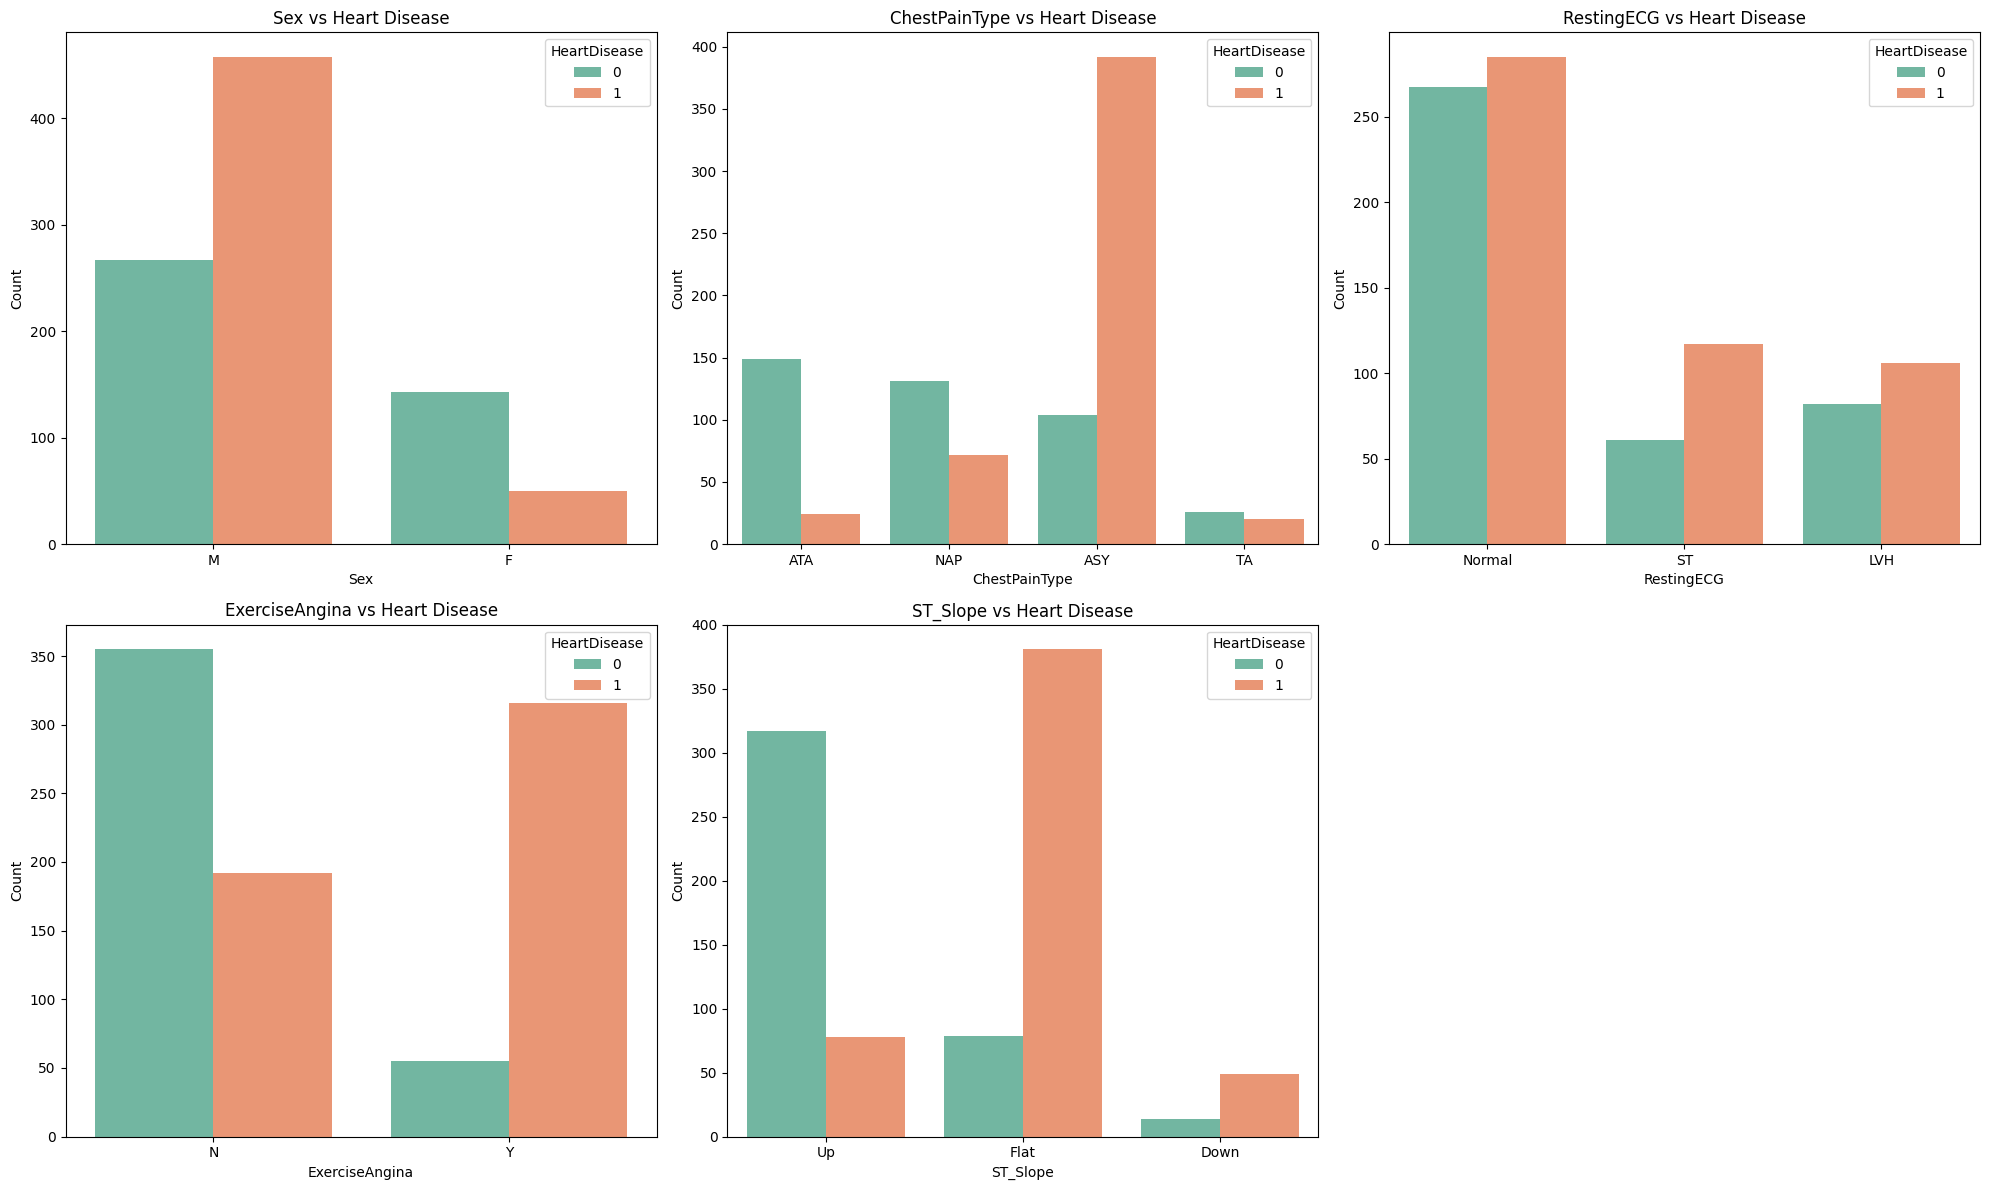

In [ ]:
# Set up subplot grid
plt.figure(figsize=(20, 12))  # adjust size based on number of plots

# Create subplots for each categorical column
for idx, col in enumerate(categorical_cols):
    plt.subplot(2, 3, idx+1)
    sns.countplot(x=col, hue='HeartDisease', data=data, palette='Set2')
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease')

plt.tight_layout()
plt.show()

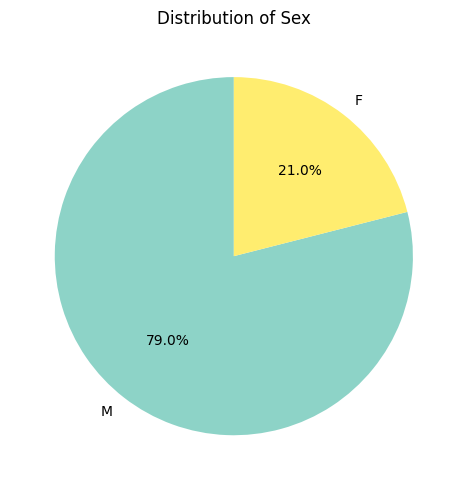

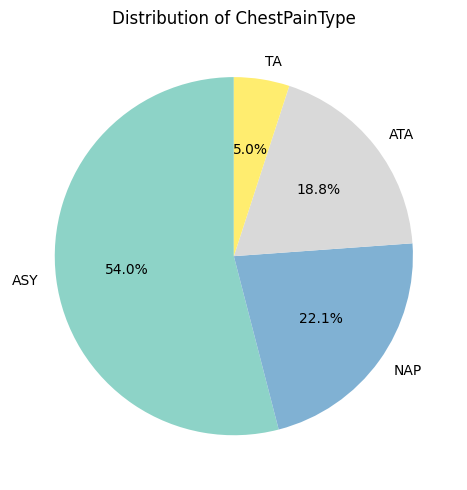

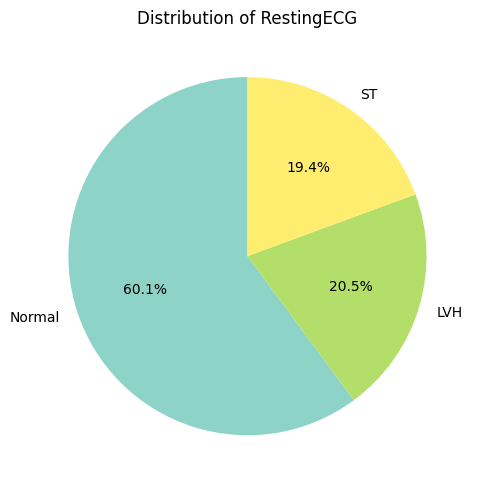

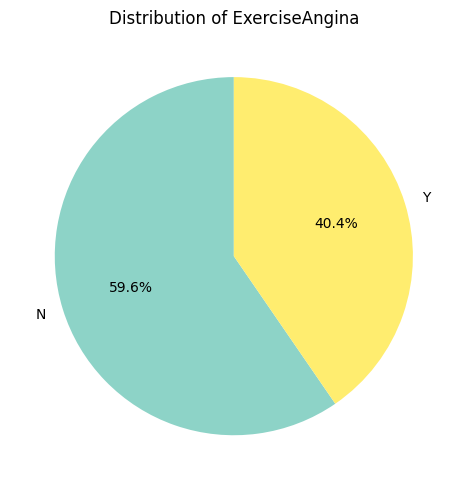

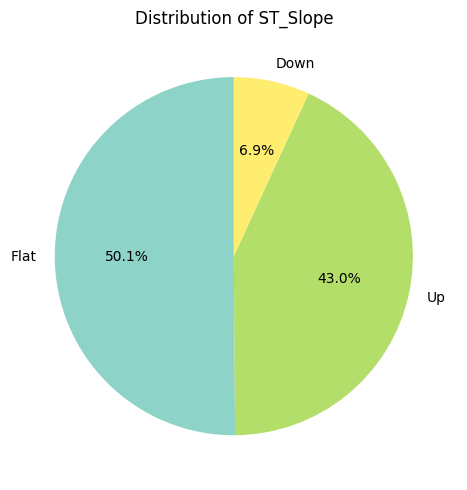

In [ ]:
# Create pie charts
for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hides y-label
    plt.tight_layout()
    plt.show()

Mean age: 53.510893246187365
Median age: 54.0


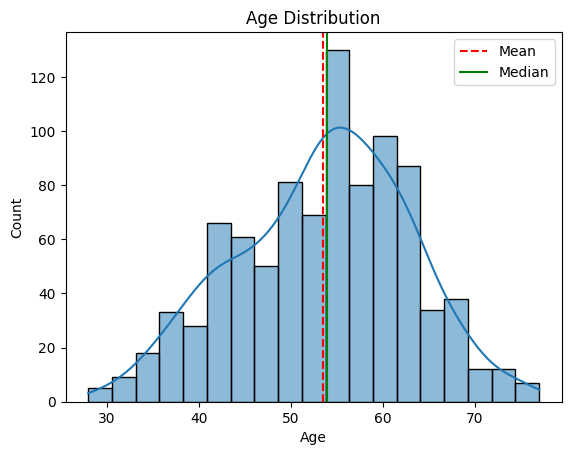

In [ ]:
# Histogram for "age"
sns.histplot(data["Age"], kde=True)
plt.title("Age Distribution")

# Calculate mean and median of age
mean_age = data["Age"].mean()
median_age = data["Age"].median()

# Print values
print("Mean age:", mean_age)
print("Median age:", median_age)

# Draw vertical lines for mean and median on the plot
plt.axvline(mean_age, color="red", linestyle="--", label="Mean")
plt.axvline(median_age, color="green", linestyle="-", label="Median")

# Show the legend and the plot
plt.legend()
plt.show()

#plt.axvline:This draws a vertical line on your plot at position x (on the x-axis).
# density plot—to show where the mean and median values of the "Age" column lie.

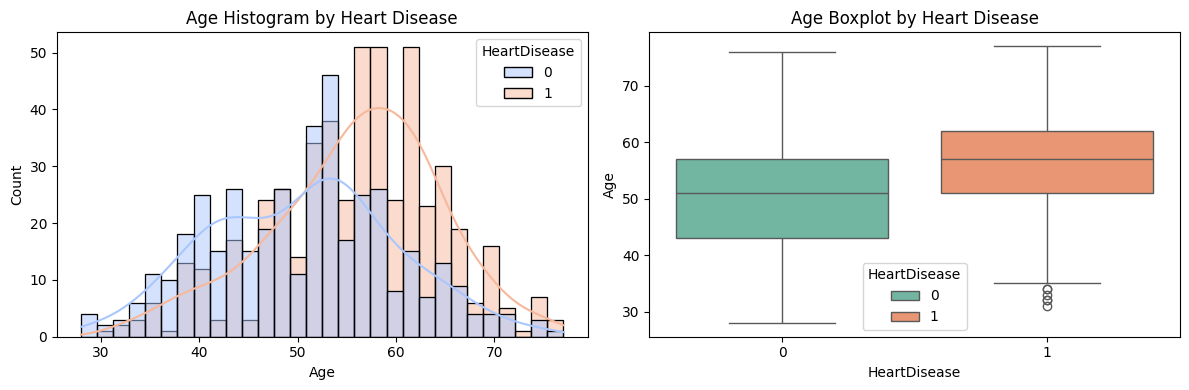

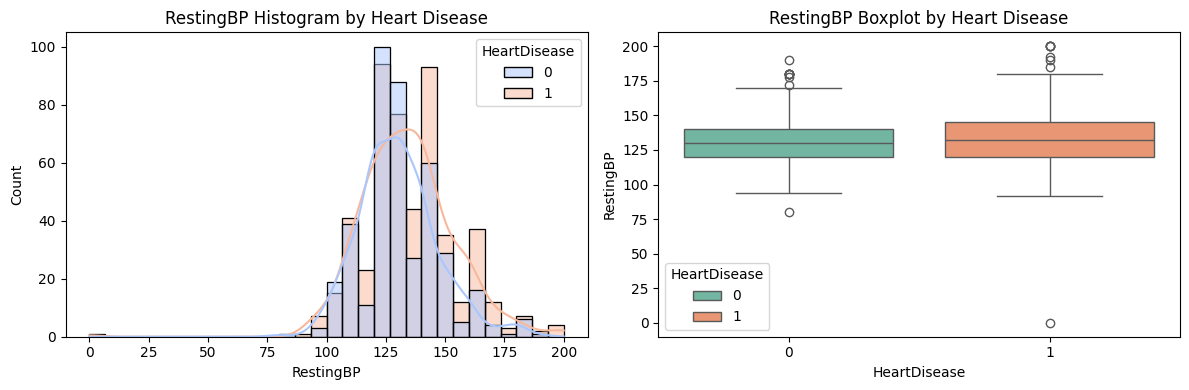

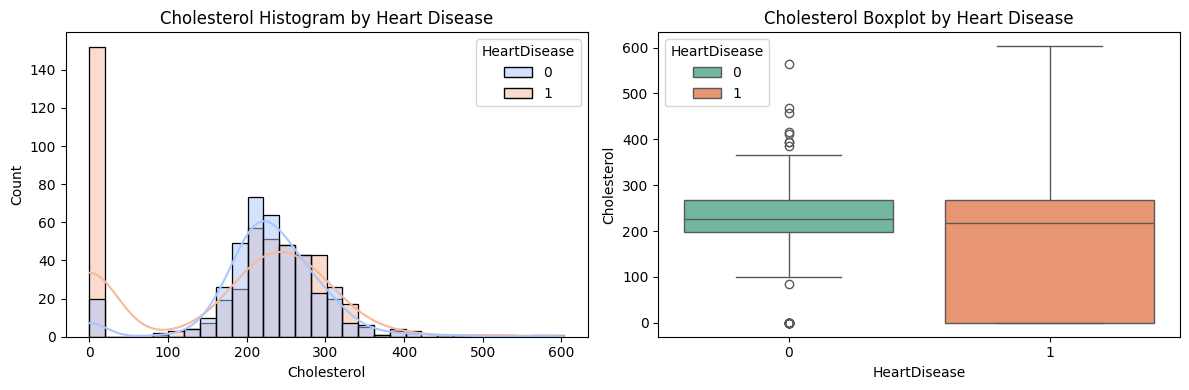

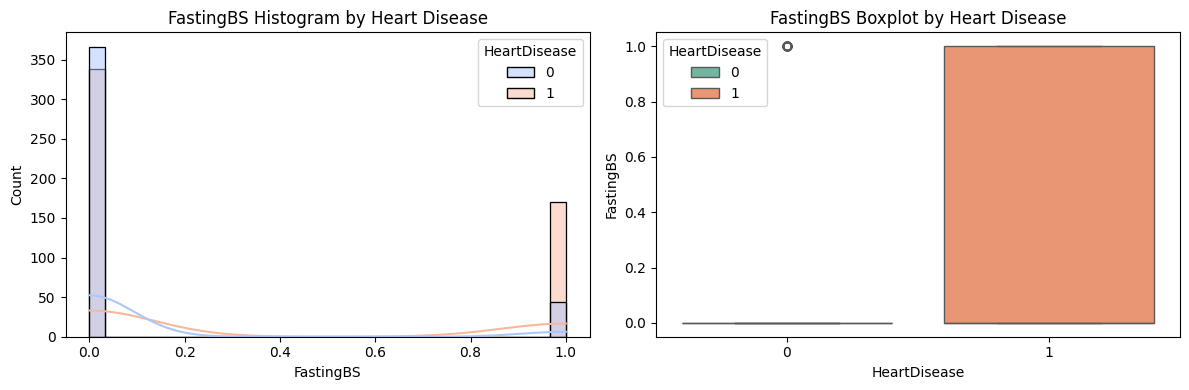

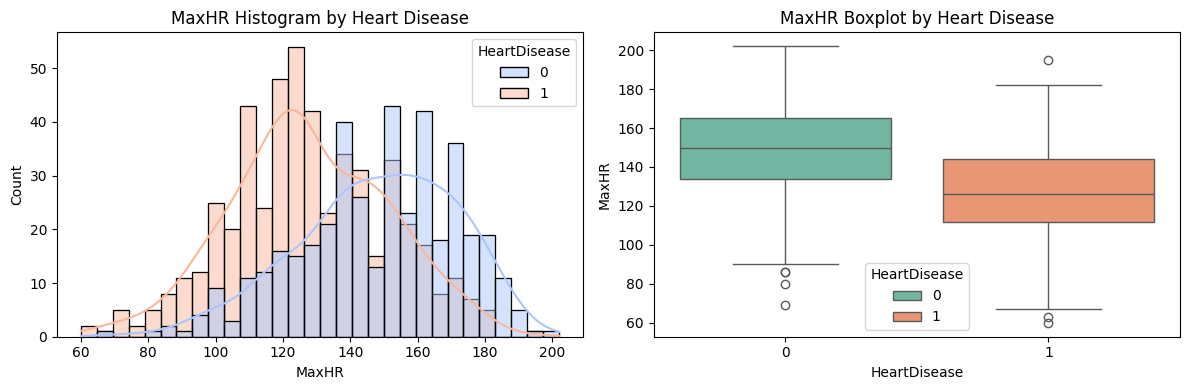

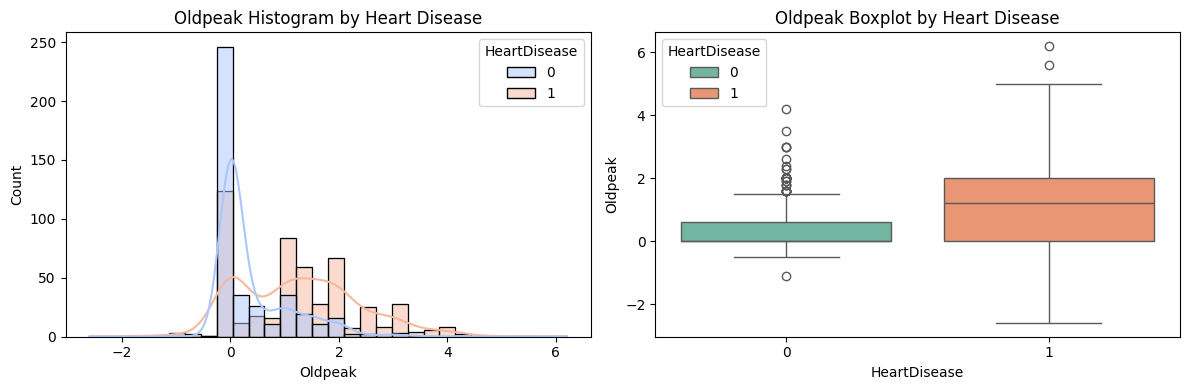

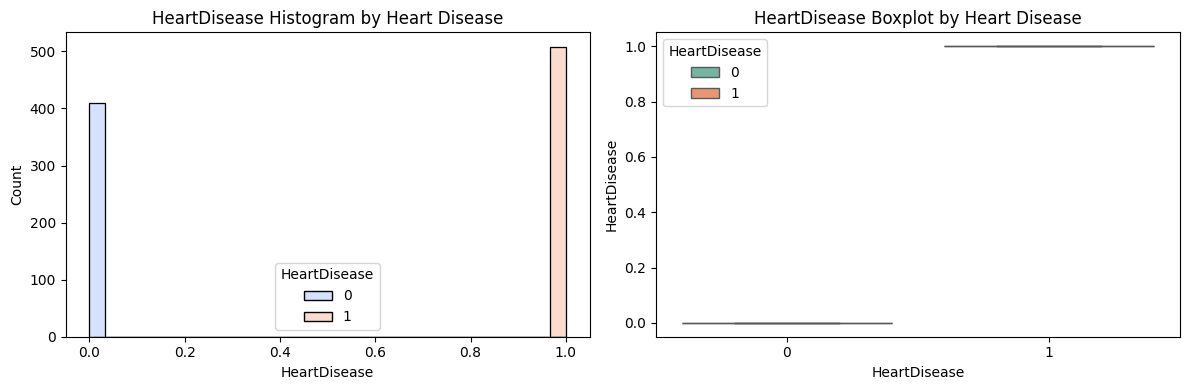

In [ ]:
# Plotting
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    #histplot
    sns.histplot(data=data, x=col, hue='HeartDisease', kde=True, bins=30, ax=axes[0], palette='coolwarm')
    axes[0].set_title(f'{col} Histogram by Heart Disease')
    #boxplot fordetecting outliers
    sns.boxplot(data=data, x='HeartDisease', hue='HeartDisease',y=col, ax=axes[1], palette='Set2')
    axes[1].set_title(f'{col} Boxplot by Heart Disease')

    plt.tight_layout()
    plt.show()

**OUTLIERS HANDLING (BY REPLACING THEM WITH MEAN)**

In [ ]:
# List binary columns
binary_cols = ['FastingBS', 'HeartDisease']

# Updated numerical columns (excluding binary)
numerical_cols_new = [col for col in data.select_dtypes(include=['int64', 'float64']).columns
                      if col not in binary_cols]

# Calculate IQR
Q1 = data[numerical_cols_new].quantile(0.25)
Q3 = data[numerical_cols_new].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median (for new numerical columns only)
for col in numerical_cols_new:
    median = data[col].median()
    data[col] = data[col].mask((data[col] < lower_bound[col]) | (data[col] > upper_bound[col]), median)

/tmp/ipython-input-22-3785490706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Sex', y='HeartDisease', palette='pastel')


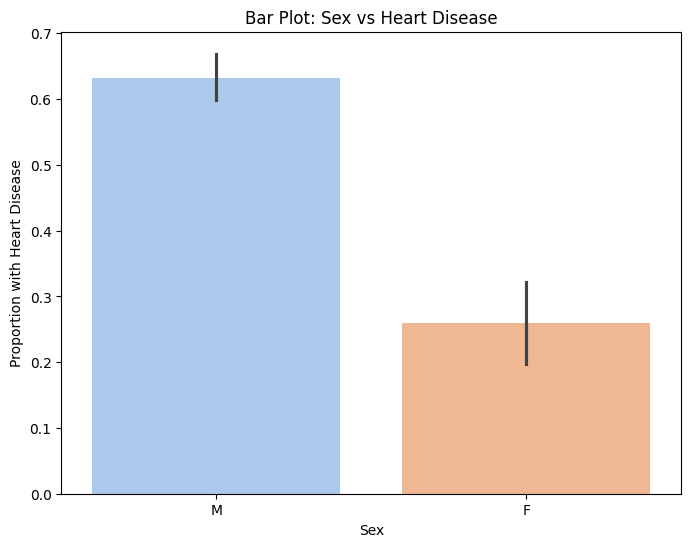

In [ ]:
#Bar plot of 'Sex' vs 'HeartDisease'
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sex', y='HeartDisease', palette='pastel')
plt.title('Bar Plot: Sex vs Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Proportion with Heart Disease')
plt.show()

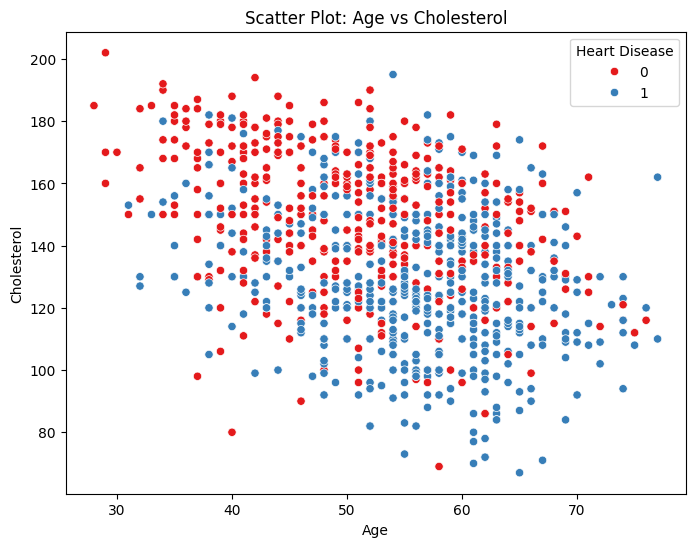

In [ ]:
#Scatter plot between Age and MaxHR
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='MaxHR', hue='HeartDisease', palette='Set1')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease')
plt.show()

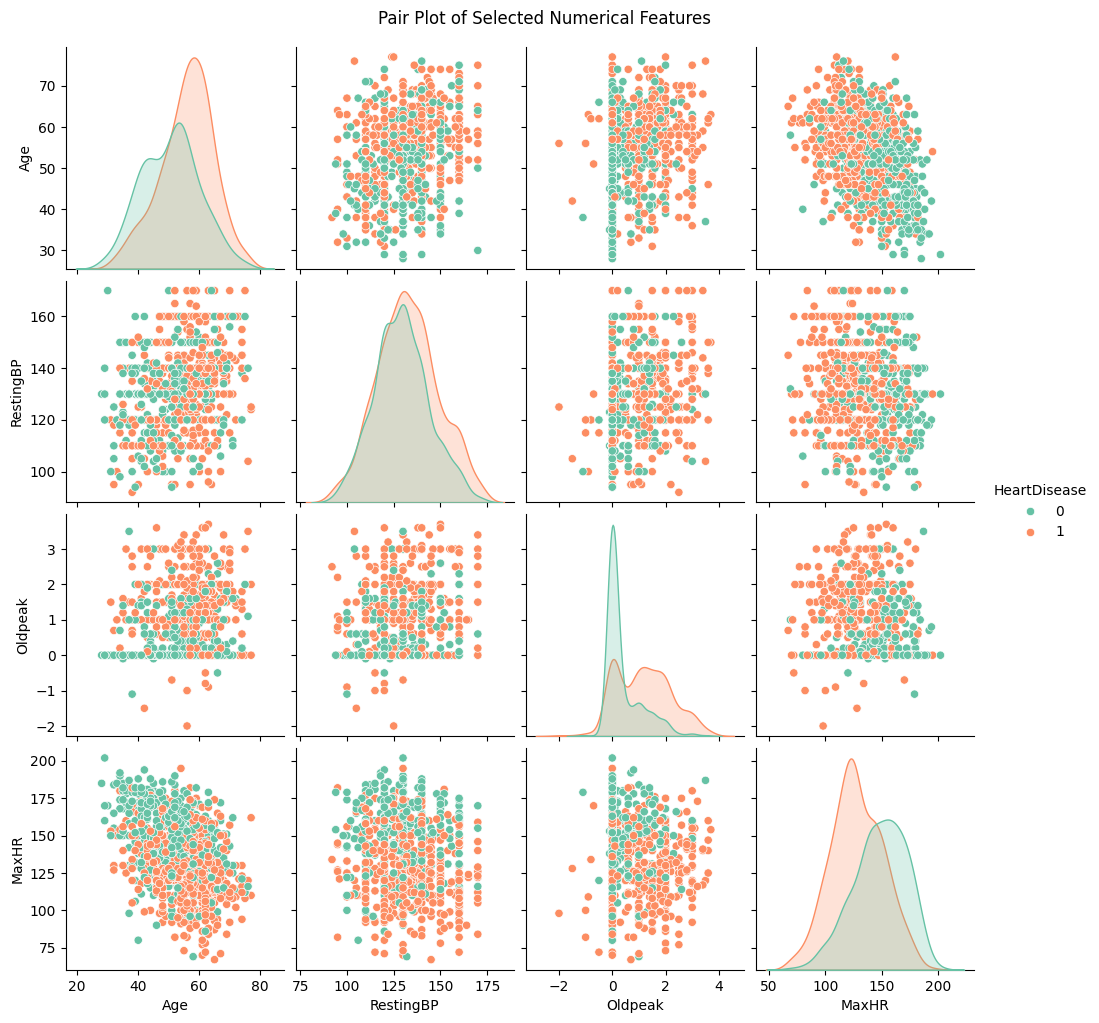

In [ ]:
#pair plot for selected numerical features colored by HeartDisease to visualize
#relationships and class separation
selected_features = ['Age', 'RestingBP', 'Oldpeak', 'MaxHR']

sns.pairplot(data[selected_features + ['HeartDisease']], hue='HeartDisease', palette='Set2')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

**DATA ENCODING**

In [ ]:
# Copy original data
df_encoded = data.copy()

# Ordinal and nominal separation
nominal_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
#(no ordinal column present in our dataset)
# One-hot encode nominal columns with 0/1 output
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True, dtype=int)


In [ ]:
#checking the encoded columns
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [ ]:
# Calculate correlation
correlation = df_encoded.corr()

# Print correlation of each feature with the target
print(correlation['HeartDisease'].sort_values(ascending=False))

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.403590
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.108036
RestingECG_ST        0.102527
Cholesterol          0.046143
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
MaxHR               -0.398365
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


In [ ]:
#Identify irrelevant features based on correlation threshold
threshold = 0.1  # Define a threshold for correlation
irrelevant_columns = correlation[correlation['HeartDisease'].abs() < threshold].index.tolist()
print("Irrelevant Columns based on correlation:", irrelevant_columns)

Irrelevant Columns based on correlation: ['Cholesterol', 'ChestPainType_TA', 'RestingECG_Normal']


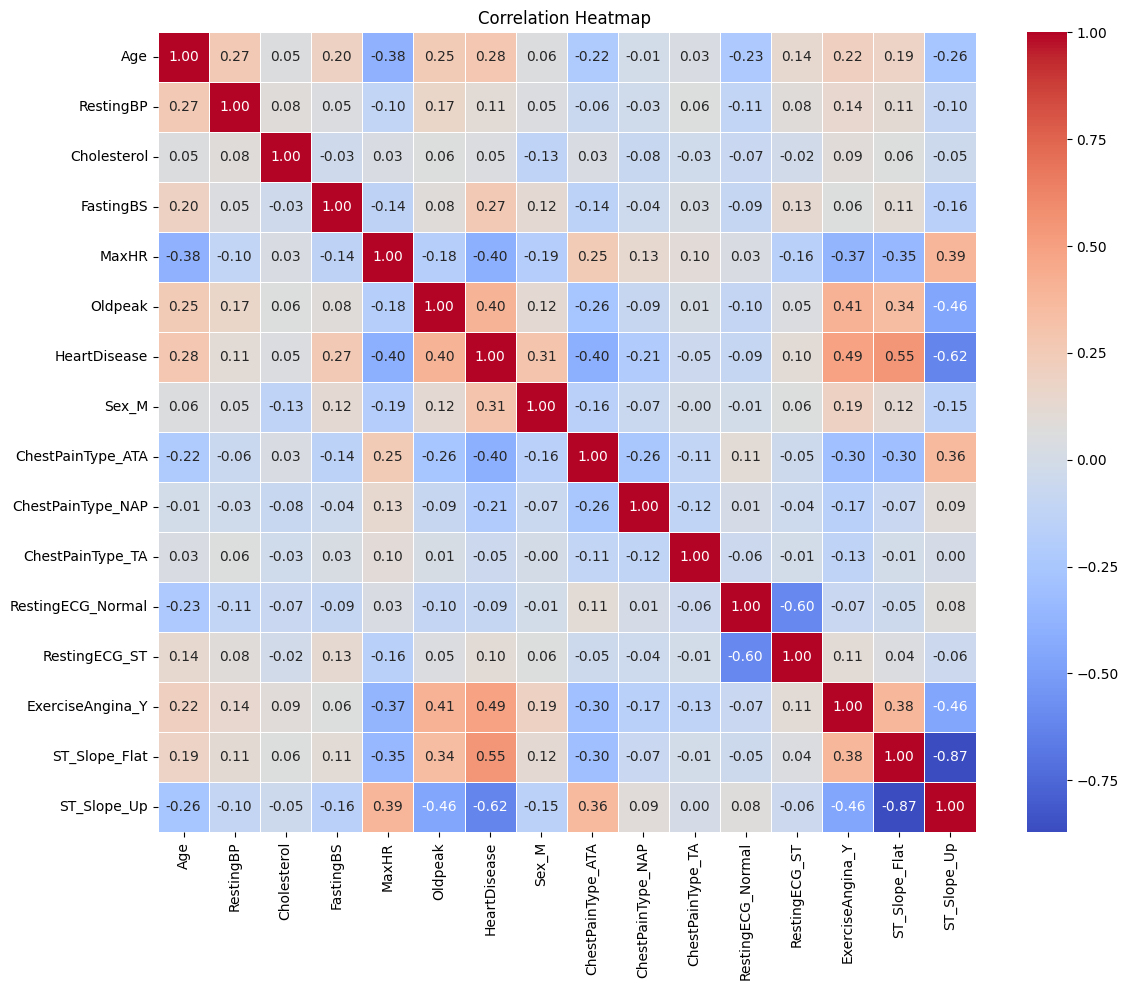

In [ ]:
plt.figure(figsize=(12, 10))

# correlation
corr_matrix = df_encoded.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.tight_layout()
plt.show()

In [ ]:
df_encoded = df_encoded.drop(columns=['Cholesterol', 'ChestPainType_TA', 'RestingECG_Normal'])

**SPLITTING DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split into train and test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(734, 12)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(734,)
(184,)


In [ ]:
y_train.value_counts()

,count
HeartDisease,
1,406
0,328


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the datasetclass distribution in the training set by generating
#synthetic samples for the minority class

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class balance
print(y_train_smote.value_counts())

HeartDisease
1    406
0    406
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
#Applies standard scaling (z-score normalization) to the features: fits on the SMOTE-balanced training set
#and transforms both training and test data to have zero mean and unit variance

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
## Importing classifiers and tools for model selection, evaluation, and hyperparameter
#tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**LOGISTIC REGRESSION**

In [ ]:
#algo gives better result on scaled data
# Define the model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Define the hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# RandomizedSearchCV setup
random_search_lr = RandomizedSearchCV(logreg, param_grid_lr, n_iter=5, cv=5,
                                      scoring='accuracy', random_state=42, n_jobs=-1)

# Fit on training data
random_search_lr.fit(X_train_smote_scaled, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best model when
best_lr = random_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", random_search_lr.best_params_)

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        82
           1       0.89      0.85      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy Score: 0.8586956521739131


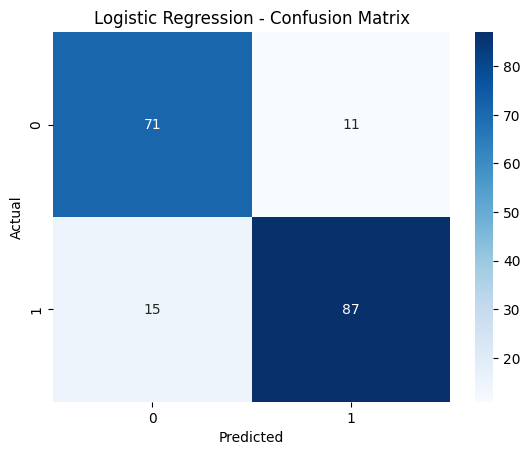

In [ ]:
# Predictions
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**KNN(K NEAREST NEIGHBOURS)**

In [ ]:
#works better on scaled data
# Define the model
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': list(range(3, 20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# RandomizedSearchCV
random_search_knn = RandomizedSearchCV(knn, param_grid_knn, n_iter=10, cv=5,
                                       scoring='accuracy', random_state=42, n_jobs=-1)

# Fit on training data
random_search_knn.fit(X_train_smote_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best model when
best_knn = random_search_knn.best_estimator_
print("Best Parameters for KNN:", random_search_knn.best_params_)

Best Parameters for KNN: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'euclidean'}



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy Score: 0.8586956521739131


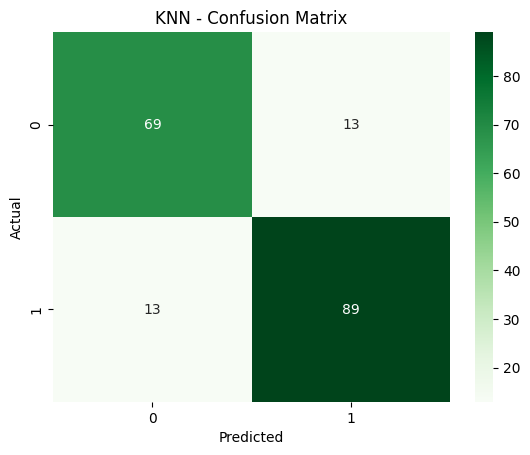

In [ ]:
# Predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SVM(Support Vehicle Machine)**

In [ ]:
from sklearn.svm import SVC
# Define the model
svm = SVC(probability=True, random_state=42)

# Define hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# RandomizedSearchCV
random_search_svm = RandomizedSearchCV(svm, param_grid_svm, n_iter=6, cv=5,
                                       scoring='accuracy', random_state=42, n_jobs=-1)

# Fit on training data
random_search_svm.fit(X_train_smote_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best model
best_svm = random_search_svm.best_estimator_
print("Best Parameters for SVM:", random_search_svm.best_params_)}

Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy Score: 0.8586956521739131


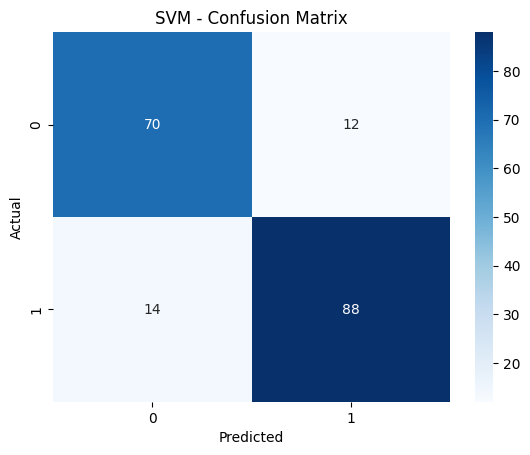

In [ ]:
# Predictions
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**DECISION TREE**

In [ ]:
#works same on scaled as well unscaled data
# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(5, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search_dt = RandomizedSearchCV(dt, param_grid_dt, n_iter=20, cv=5,
                                      scoring='accuracy', random_state=42, n_jobs=-1)

# Fit on training data
random_search_dt.fit(X_train_smote_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [ ]:
#Best model when
best_dt = random_search_dt.best_estimator_
print("Best Parameters for Decision Tree:", random_search_dt.best_params_)

Best Parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}



Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        82
           1       0.81      0.79      0.80       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

Accuracy Score: 0.782608695652174


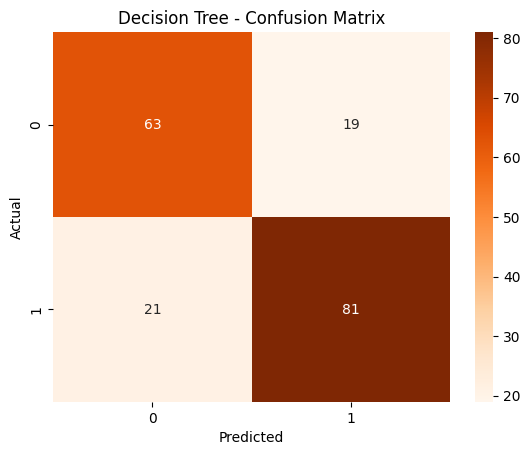

In [ ]:
# Predictions
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**RANDOM FOREST**

In [ ]:
# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, n_iter=20, cv=5,
                                      scoring='accuracy', random_state=42, n_jobs=-1)

# Fit on training data
random_search_rf.fit(X_train_smote_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best model when
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

Best Parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        82
           1       0.87      0.82      0.84       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Accuracy Score: 0.8315217391304348


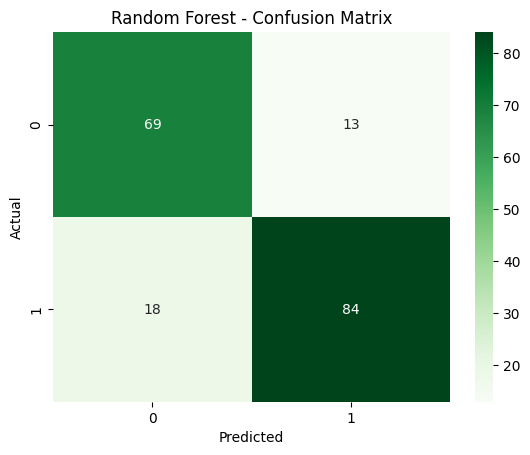

In [ ]:
# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XGBOOST**

In [ ]:
# Define model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb,
                                       param_distributions=param_grid_xgb,
                                       n_iter=20,
                                       cv=5,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=1,
                                       random_state=42)

# Fit
random_search_xgb.fit(X_train_smote_scaled, y_train_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Best model
best_xgb = random_search_xgb.best_estimator_
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        82
           1       0.91      0.84      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy Score: 0.8641304347826086


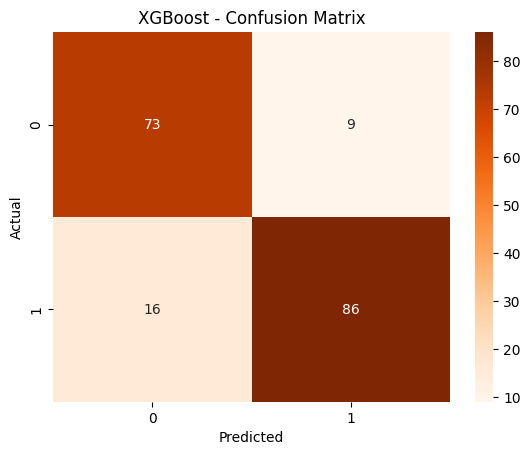

In [ ]:
# Predictions
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()